In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data= pd.read_csv("telecom_churn_data.csv",sep=",",encoding="ISO8859-1")
churn_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
churn_data.shape

(99999, 226)

In [4]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
churn_data.shape

(99999, 226)

## filter high value customer data.

In [6]:
#cols to use for filtering high value customers

cols =["total_rech_data_6","av_rech_amt_data_6","total_rech_data_7","av_rech_amt_data_7","total_rech_amt_6","total_rech_amt_7"]

In [7]:
# Checking null values for the columns we are going to use to create High value customer data
churn_data[cols].isnull().mean()

total_rech_data_6     0.748467
av_rech_amt_data_6    0.748467
total_rech_data_7     0.744287
av_rech_amt_data_7    0.744287
total_rech_amt_6      0.000000
total_rech_amt_7      0.000000
dtype: float64

    - We can see that "total_rech_data_6","av_rech_amt_data_6","total_rech_data_7","av_rech_amt_data_7",
      this columns have 74 % of null data.
    -  Above Columns we are going to use are having null data and we will fill data with 0
    -  Because here null values means user has not done any reaharge or not used any service for that period.
    -  We will do remaining data cleaning after Filtering data with High Value customers.

In [8]:
churn_data["total_rech_data_6"]  = churn_data["total_rech_data_6"].fillna(0)
churn_data["total_rech_data_7"]  = churn_data["total_rech_data_7"].fillna(0)
churn_data["av_rech_amt_data_6"] = churn_data["av_rech_amt_data_6"].fillna(0)
churn_data["av_rech_amt_data_7"] = churn_data["av_rech_amt_data_7"].fillna(0)

-  Creating new columns for Total data recharge amount for 6 and 7 months

In [9]:
churn_data['total_rech_amt_data_6'] = churn_data['total_rech_data_6'] * churn_data['av_rech_amt_data_6']
churn_data['total_rech_amt_data_7'] = churn_data['total_rech_data_7'] * churn_data['av_rech_amt_data_7']

- Creating total recharge amount including data recharge derived above and total voice recharge for 6 and 7 month

In [10]:
churn_data['final_total_rech_amt_6'] = churn_data[['total_rech_amt_6','total_rech_amt_data_6']].sum(axis=1)
churn_data['final_total_rech_amt_7'] = churn_data[['total_rech_amt_7','total_rech_amt_data_7']].sum(axis=1)

In [11]:
#creating average recharge amount for good period (6 and 7 month)

churn_data['avg_rech_amt_good_phase'] = churn_data[['final_total_rech_amt_6','final_total_rech_amt_7']].mean(axis=1)

#### Filter data using  amount more than or equal to avg recharge amount for good phase

In [12]:
#filter high value customer based of recharges for first two months

rechargelimit=churn_data['avg_rech_amt_good_phase'].quantile(0.7)
print("high value limit : ",rechargelimit)

churn_data=churn_data[(churn_data["avg_rech_amt_good_phase"] >= rechargelimit)]
print("Shape of high values customer dataset: " ,churn_data.shape)

high value limit :  478.0
Shape of high values customer dataset:  (30001, 231)


### Tag churners and remove attributes of the churn phase
    - here we will find total usage for 9 th month and if useage is 0 will will label it as CHURN(1) else NOT CHURN(0)
    - After this we will remove all features corresponding to month 9 as those will not be available for
      prediction in future

   - Those who have not made any calls  means          : total_ic_mou_9 + total_og_mou_9 = 0.00 <br>
   - AND have not used mobile internet even once means : vol_2g_mb_9 +vol_3g_mb_9 = 0.00<br><br>
   - We do not have to impute null values here as SUM() will take care of null values.
   - By default, the sum of an empty or all-NA Series is 0.
   - We will do data cleaning in later stage

In [13]:
# Total incoming and outgoing usage

churn_data["total_ic_og_mou_9"] = churn_data[["total_ic_mou_9","total_og_mou_9"]].sum(axis=1)

# Total internet usage

churn_data["total_internet_9"]=churn_data[["vol_2g_mb_9","vol_3g_mb_9"]].sum(axis=1)

# Total internet plus incoming outgoing usage

churn_data["total_usage_9"]=churn_data[["total_ic_og_mou_9","total_internet_9"]].sum(axis=1)


- Tag churn i.e 1  if total usage is 0 else tage as non churn i.e 0

In [14]:

churn_data["churn"]=churn_data["total_usage_9"].apply(lambda x: 1 if x==0.00 else 0)

### Churn Count and Churn percentage 

In [15]:
#check churn percentage
print("Churn Percentage :")
churn_data["churn"].value_counts(normalize=True)*100

Churn Percentage :


0    91.863605
1     8.136395
Name: churn, dtype: float64

     - As we can see Class imbalance, We will handle this while building model using "class_weight"

### Remove all attributes corresponding to churn phase

In [16]:
#remove attributes having _9 or Sep in column names as they are related to churn phase

churn_data.drop(churn_data.filter(regex='_9|sep', axis = 1).columns, axis=1,inplace=True)


In [17]:
# shape of new dataset
churn_data.shape

(30001, 177)

In [18]:
#churn_data.to_csv("churn_data.csv")

## Derive new features

#### converting date columns and deriving new features

In [19]:
#Chnaging the type of date columns
churn_data["date_of_last_rech_6"]= pd.to_datetime(churn_data["date_of_last_rech_6"])
churn_data["date_of_last_rech_7"]= pd.to_datetime(churn_data["date_of_last_rech_7"])
churn_data["date_of_last_rech_8"]= pd.to_datetime(churn_data["date_of_last_rech_8"])

churn_data["last_date_of_month_6"] = pd.to_datetime(churn_data["last_date_of_month_6"])
churn_data["last_date_of_month_7"] = pd.to_datetime(churn_data["last_date_of_month_7"])
churn_data["last_date_of_month_8"] = pd.to_datetime(churn_data["last_date_of_month_8"])

churn_data["date_of_last_rech_data_6"] = pd.to_datetime(churn_data["date_of_last_rech_data_6"])
churn_data["date_of_last_rech_data_7"] = pd.to_datetime(churn_data["date_of_last_rech_data_7"])
churn_data["date_of_last_rech_data_8"] = pd.to_datetime(churn_data["date_of_last_rech_data_8"])

- create recent recharge date for voice recharge using jun/jul/aug data

In [20]:
churn_data["recent_rech_date"]=churn_data[["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"]].max(axis=1)

- Create column total days from recent recharge till the end of aug.as aug is our action phase

In [21]:
# total days from recent recharge till the end of aug

churn_data["total_days_from_rech"] = (churn_data["last_date_of_month_8"] - churn_data["recent_rech_date"]).dt.days

#convert days column to int

churn_data["total_days_from_rech"]=churn_data["total_days_from_rech"].fillna(0).astype("int")

- create recent recharge date for data recharge using jun/jul/aug data

In [22]:
churn_data["recent_rech_date_data"]=churn_data[["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]].max(axis=1)

In [23]:
# total days from recent  data recharge till the end of aug

churn_data["total_days_from_rech_data"] = (churn_data["last_date_of_month_8"] - churn_data["recent_rech_date_data"]).dt.days

#convert last internet recharge days column to int

churn_data["total_days_from_rech_data"]=churn_data["total_days_from_rech_data"].fillna(0).astype("int")

In [24]:
# drop original date related columns

churn_data.drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","last_date_of_month_6",
                 "last_date_of_month_7","last_date_of_month_8","recent_rech_date","recent_rech_date_data",
                "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"],axis=1,inplace=True)

In [25]:
churn_data.isnull().mean()

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.007466
std_og_t2o_mou               0.007466
loc_ic_t2o_mou               0.007466
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.018166
onnet_mou_7                  0.017899
onnet_mou_8                  0.039132
offnet_mou_6                 0.018166
offnet_mou_7                 0.017899
offnet_mou_8                 0.039132
roam_ic_mou_6                0.018166
roam_ic_mou_7                0.017899
roam_ic_mou_8                0.039132
roam_og_mou_6                0.018166
roam_og_mou_7                0.017899
roam_og_mou_8                0.039132
loc_og_t2t_mou_6             0.018166
loc_og_t2t_mou_7             0.017899
loc_og_t2t_mou_8             0.039132
loc_og_t2m_mou_6             0.018166
loc_og_t2m_mou_7             0.017899
loc_og_t2m_mou_8             0.039132
loc_og_t2f_m

# Data Cleaning

- On Final data set we will do the data cleaning
- We will drop columns having only one unique value as variance of all such columns will be 0

In [26]:
#Checking the unique value counts in columns

featureValues={}
for d in churn_data.columns.tolist():
    count=churn_data[d].nunique()
    if count==1:
        featureValues[d]=count

# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())

print("Columns having 1 unique value are :\n",cols_to_drop)

Columns having 1 unique value are :
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [27]:
# drop above columns
churn_data.drop(cols_to_drop,axis=1,inplace=True)

- We will drop mobileno column as it is just a unique id

In [28]:
churn_data.drop("mobile_number",inplace=True,axis=1)

In [29]:
#Checking null percentage
churn_data.isnull().mean()*100

arpu_6                        0.000000
arpu_7                        0.000000
arpu_8                        0.000000
onnet_mou_6                   1.816606
onnet_mou_7                   1.789940
onnet_mou_8                   3.913203
offnet_mou_6                  1.816606
offnet_mou_7                  1.789940
offnet_mou_8                  3.913203
roam_ic_mou_6                 1.816606
roam_ic_mou_7                 1.789940
roam_ic_mou_8                 3.913203
roam_og_mou_6                 1.816606
roam_og_mou_7                 1.789940
roam_og_mou_8                 3.913203
loc_og_t2t_mou_6              1.816606
loc_og_t2t_mou_7              1.789940
loc_og_t2t_mou_8              3.913203
loc_og_t2m_mou_6              1.816606
loc_og_t2m_mou_7              1.789940
loc_og_t2m_mou_8              3.913203
loc_og_t2f_mou_6              1.816606
loc_og_t2f_mou_7              1.789940
loc_og_t2f_mou_8              3.913203
loc_og_t2c_mou_6              1.816606
loc_og_t2c_mou_7         

- From above we can see that all internet/data related columns for 6,7,8 months are missing with along with        <b>date_of_last_rech_data_</b> for that specific month.
- Also for all these columns have same missing percentage
- This may be beacuse user has not done the internet/data recharge beacuse for these columns 
  as date of last recharge is also null.
- So, we will compute data recharge related columns with 0
- We have already computed below columns while creating high value customers rest we will fill now:
    - av_rech_amt_data_6,av_rech_amt_data_7,total_rech_data_6,total_rech_data_7


In [30]:
# recharge related columns to compute with 0

rech_data_null_columns =["total_rech_data_8","av_rech_amt_data_8",
                         "max_rech_data_8","max_rech_data_7","max_rech_data_6",
                         "count_rech_2g_8","count_rech_2g_7","count_rech_2g_6",
                         "count_rech_3g_8","count_rech_3g_7","count_rech_3g_6",
                         "arpu_2g_6","arpu_2g_7","arpu_2g_8",
                         "arpu_3g_6","arpu_3g_7","arpu_3g_8"]

In [31]:
#Fill above columns with 0

churn_data[rech_data_null_columns] = churn_data[rech_data_null_columns].fillna(0)

- For columns related to call usage are having null values in the range of 1 to 3 %
- If we analyse this data we come to know that if e.g onnet_mou_6 is having null value then,
  all the related columns to call usage have the either null or 0 value.
- This is because user have not used any call related service for that time period 
  but may have used other data related services.
- So we will impute null values for this columns with 0 instead of any other criteria.


In [32]:
call_usage_colums=[x for x in churn_data.columns if "_mou" in x ]

In [33]:
churn_data[call_usage_colums] = churn_data[call_usage_colums].fillna(0)

 - smilarly we will impute columns og_others_ and  ic_others_ with 0
 - As they are null because all other columns related to mou are null 
 - i.e user has not used service

In [34]:
other_col= ["ic_others_6","ic_others_7","ic_others_8","og_others_6","og_others_7","og_others_8"]
churn_data[other_col] = churn_data[other_col].fillna(0)

### Imputing Null values of categorical columns

- We have categorical columns in dataset related to night_pck_user and fb_user.
- We will impute null values for this columns as a new category with -1 value.
- Also we will change type of this columns to category.

In [35]:
categorical_columns =["night_pck_user_6","night_pck_user_7","night_pck_user_8",
                      "fb_user_6","fb_user_7","fb_user_8"]

In [36]:
#create new category for null values

churn_data[categorical_columns] = churn_data[categorical_columns].fillna(-1)

#change datatype to category
churn_data[categorical_columns] = churn_data[categorical_columns].astype('category')

# Exploratory Data Analysis

- Univariate analysis for target column "churn"

In [37]:
#function to display bar values
def displayBarValues(chartName,ty=""):
    for p in chartName.patches:
        bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
        bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
        bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
        if(ty=="per"):
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(str)(round(bar_height,1))+"%" or '', color='black', ha="center")
        else:
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(round(bar_height,1)) or '', color='black', ha="center")
       # hideLinesForBar(chartName)
        
def hideLinesForBar(chartname):
    chartname.spines['top'].set_visible(False)
    chartname.spines['right'].set_visible(False)

def displayPieChartValues(chartname):
    chartname.legend(wedges, PerData.funding_round_type,
          title="Funding Types",
          loc="upper left",
          bbox_to_anchor=(0.8, 0, 0.3, 1))
    plt.setp(autotexts, size=8, weight="bold",color='w')

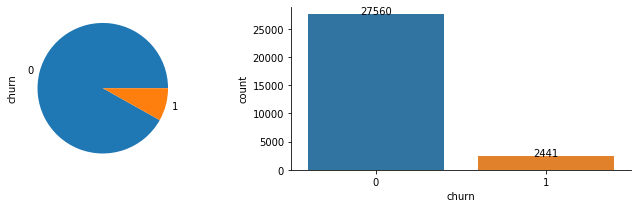

In [38]:
# distplot for target variable
fig= plt.figure(figsize=(10,3) )

fig.add_subplot(1,2,1)
churn_data["churn"].value_counts(normalize=True).plot.pie()

fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=churn_data["churn"])
displayBarValues(churnchart)
hideLinesForBar(churnchart)
plt.tight_layout()
plt.show()

<b>Observations: </b>
    - from above chart we can see that there is much imbalance in chrun 
    - churn value are so much less compared to non churn
    - so we will have to do minority oversampling before model building

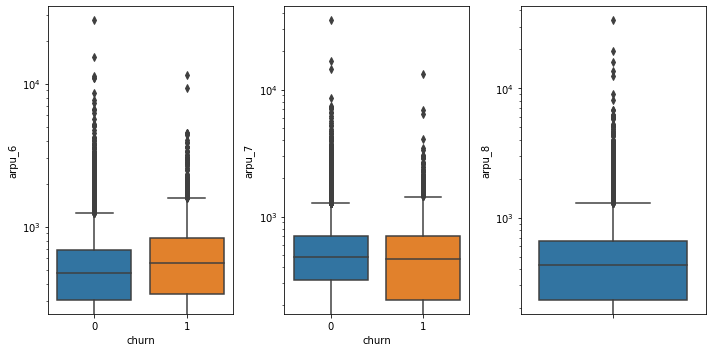

In [39]:
# observing churn with respect to avg revenu for 6,7,8 month
fig= plt.figure(figsize=(10,5) )

fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=churn_data["churn"],y=churn_data["arpu_6"])
ar_6.set_yscale("log")

fig.add_subplot(1,3,2)
ar_7=sns.boxplot(x=churn_data["churn"],y=churn_data["arpu_7"])
ar_7.set_yscale("log")

fig.add_subplot(1,3,3)
ar_8=sns.boxplot(y=churn_data["arpu_8"],hue=churn_data["churn"])
plt.xticks(rotation=90) 
ar_8.set_yscale("log")
plt.tight_layout()
plt.show()

- We can see that there is large difference in average revenue generated by churned user in action phase
- so we can say that avg revenue for the 8 month is a good indicator of churn

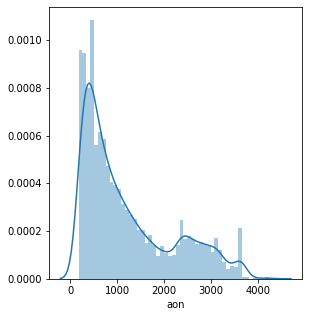

In [40]:
# Checking aon distribution and relation with churn
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(churn_data["aon"])

#create a graph to analyse churn w.rt aon categories



Functions to create graph by comparing percentages of churn with different attributes

In [41]:

def perc_of_churned_graph(index_colName, title, bx,num1,num2=-1):
    pivot_table1 = pd.pivot_table(churn_data, index=[index_colName], columns=['churn'], aggfunc=len, values=["aon"])
    pivot_df = pd.DataFrame(pivot_table1)
    pivot_df['perc_of_churned'] = (pivot_df[('aon',  1)] / (pivot_df[('aon',  1)] + pivot_df[('aon',  0)]) * 100)
    pivot_df.sort_values( by="perc_of_churned",inplace=True )
    if num2 == -1:
        sns.barplot(x = pivot_df.index , y = 'perc_of_churned', data = pivot_df, ax=bx[num1],palette="RdPu_r")
        bx[num1].set_title(title)
        displayBarValues(bx[num1],"per")
        hideLinesForBar(bx[num1])
    else:
        sns.barplot(x = pivot_df.index , y = 'perc_of_churned', data = pivot_df, ax=bx[num1][num2],palette="RdPu_r")
        bx[num1][num2].set_title(title)
        displayBarValues(bx[num1][num2],"per")
        hideLinesForBar(bx[num1][num2])

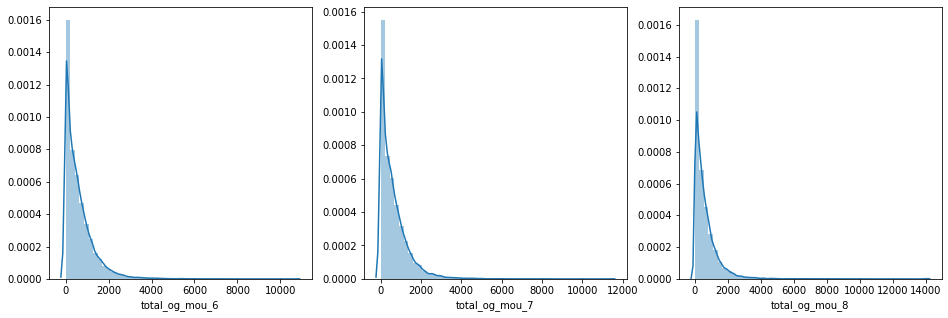

In [42]:
# Analysing  distribution of Total outgoing minute of usage for 3 months

fig=plt.figure(figsize=(16,5))
fig.add_subplot(1,3,1)
sns.distplot(churn_data["total_og_mou_6"])

fig.add_subplot(1,3,2)
sns.distplot(churn_data["total_og_mou_7"])

fig.add_subplot(1,3,3)
sns.distplot(churn_data["total_og_mou_8"])

plt.show()

- variables are right skewed
- There are outliers in all the features

In [43]:
# Creating bins to visualize above column

In [44]:
churn_data["total_og_mou_bin_6"] = pd.cut(churn_data["total_og_mou_6"], bins=[0, 200, 400, 600, 800, 1000, 1500, 2000, np.inf], labels=["<200","200-400","400-600","600-800","800-1000","1000-1500","1500-2000","2000+"], include_lowest = True)
churn_data["total_og_mou_bin_7"] = pd.cut(churn_data["total_og_mou_7"], bins=[0, 200, 400, 600, 800, 1000, 1500, 2000, np.inf], labels=["<200","200-400","400-600","600-800","800-1000","1000-1500","1500-2000","2000+"], include_lowest = True)
churn_data["total_og_mou_bin_8"] = pd.cut(churn_data["total_og_mou_8"], bins=[0, 200, 400, 600, 800, 1000, 1500, 2000, np.inf], labels=["<200","200-400","400-600","600-800","800-1000","1000-1500","1500-2000","2000+"], include_lowest = True)

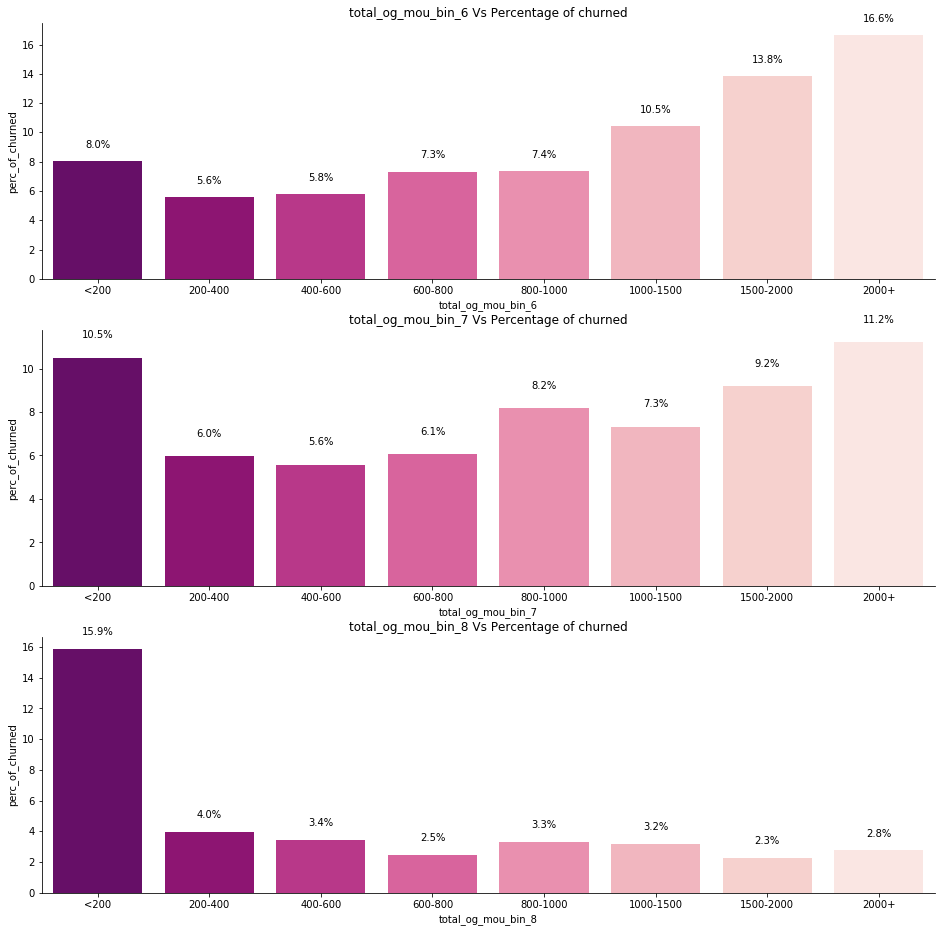

In [45]:
# Percentage of churn VS Total Outgoing minutes of usage
fi,fx=plt.subplots(3,1,figsize=(16,16))

perc_of_churned_graph('total_og_mou_bin_6',"total_og_mou_bin_6 Vs Percentage of churned", fx, 0)

perc_of_churned_graph('total_og_mou_bin_7',"total_og_mou_bin_7 Vs Percentage of churned", fx, 1)

perc_of_churned_graph('total_og_mou_bin_8',"total_og_mou_bin_8 Vs Percentage of churned", fx, 2)

plt.show()

Obesrvations:
 - From above graphs we can say that people having very less outgoing call usage have more percentage of churn

In [46]:
#dropping above variables created for visualization only
churn_data.drop(["total_og_mou_bin_6", "total_og_mou_bin_7", "total_og_mou_bin_8"],axis=1,inplace=True)

###  visualising Age on network with other variables

In [47]:
#creating
churn_data["aon_bin"] = pd.cut(churn_data["aon"], bins=[0,300,600,900,1500,2000,2500,3000,4000, np.inf], labels=["<300","300-600","600-900","900-1500","1500-2000","2000-2500","2500-3000","3000-4000","4000+"], include_lowest = True)

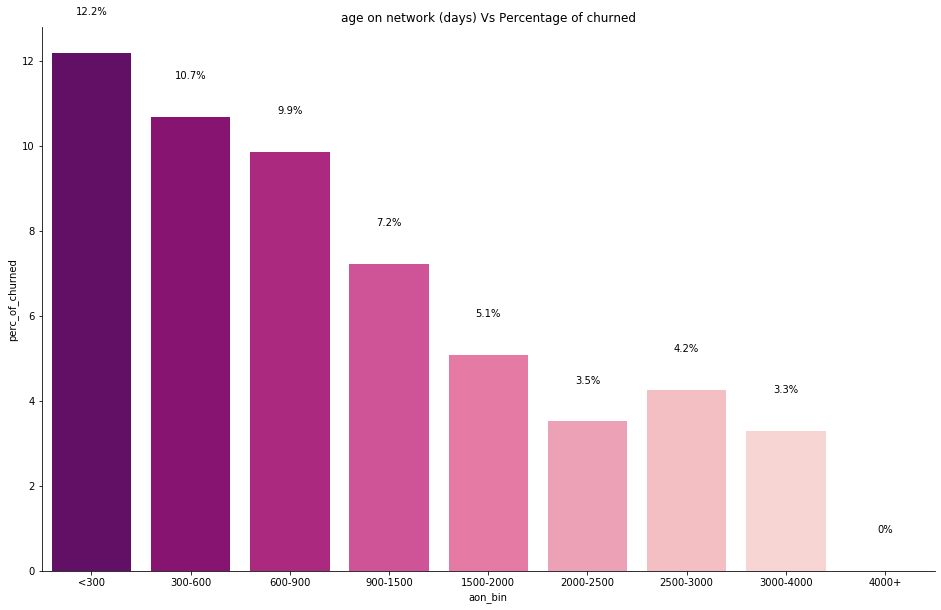

In [48]:
# Percentage of churn VS Total Outgoing minutes of usage
fi,fx=plt.subplots(1,1,figsize=(16,10))

pivot_table1 = pd.pivot_table(churn_data, index=['aon_bin'], columns=['churn'], aggfunc=len, values=["aon"])
pivot_df = pd.DataFrame(pivot_table1)
pivot_df['perc_of_churned'] = (pivot_df[('aon',  1)] / (pivot_df[('aon',  1)] + pivot_df[('aon',  0)]) * 100)
pivot_df.sort_values( by="perc_of_churned",inplace=True )

sns.barplot(x = pivot_df.index , y = 'perc_of_churned', data = pivot_df, ax=fx,palette="RdPu_r")
fx.set_title("age on network (days) Vs Percentage of churned")
displayBarValues(fx,"per")
hideLinesForBar(fx)

plt.show()

In [49]:
churn_data.drop(["aon_bin"],axis=1,inplace=True)

### Visualizing Volume 3g for 6,7,8 months

In [50]:
#creating bins for better visualization
churn_data["vol_3g_mb_bin_6"] = pd.cut(churn_data["vol_3g_mb_6"], bins=[0, 10000, 20000, 30000, 40000, np.inf], labels=["<10000","10000-20000","20000-30000","30000-40000","40000+"], include_lowest = True)
churn_data["vol_3g_mb_bin_7"] = pd.cut(churn_data["vol_3g_mb_7"], bins=[0, 10000, 20000, 30000, 40000, np.inf], labels=["<10000","10000-20000","20000-30000","30000-40000","40000+"], include_lowest = True)
churn_data["vol_3g_mb_bin_8"] = pd.cut(churn_data["vol_3g_mb_8"], bins=[0, 10000, 20000, 30000, 40000, np.inf], labels=["<10000","10000-20000","20000-30000","30000-40000","40000+"], include_lowest = True)

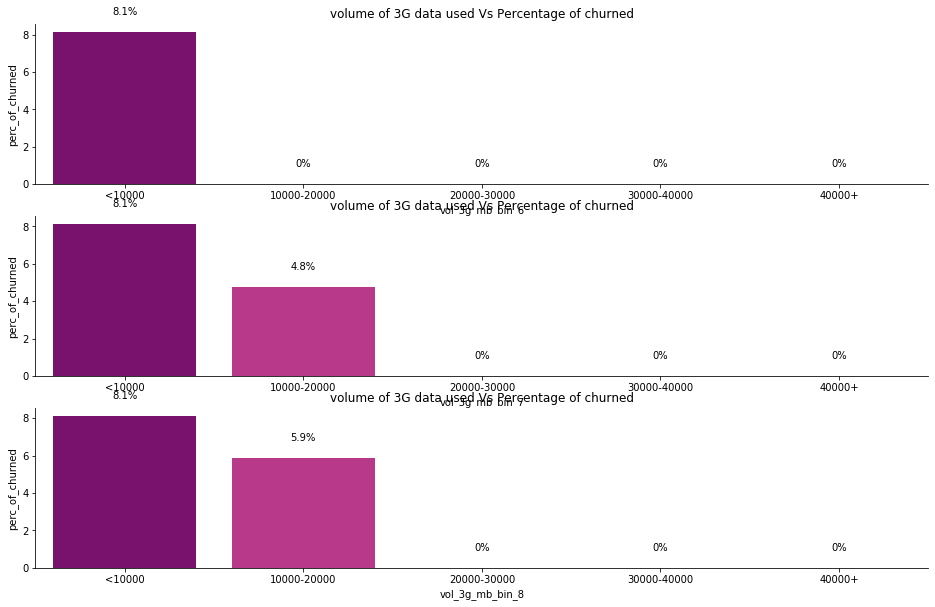

In [51]:
# Percentage of churn VS Total Outgoing minutes of usage
fi,fx=plt.subplots(3,1,figsize=(16,10))

perc_of_churned_graph('vol_3g_mb_bin_6',"volume of 3G data used Vs Percentage of churned", fx, 0)

perc_of_churned_graph('vol_3g_mb_bin_7',"volume of 3G data used Vs Percentage of churned", fx, 1)

perc_of_churned_graph('vol_3g_mb_bin_8',"volume of 3G data used Vs Percentage of churned", fx, 2)

plt.show()

- people using very less data have high chances of churn

In [52]:
churn_data.drop(["vol_3g_mb_bin_6","vol_3g_mb_bin_7","vol_3g_mb_bin_8"],axis=1,inplace=True)

In [53]:
### visualizing Volume 2g for 3 months

In [54]:
churn_data["vol_2g_mb_bin_6"] = pd.cut(churn_data["vol_2g_mb_6"], bins=[0, 2000, 4000, 6000, 8000, np.inf], labels=["<2000","2000-4000","4000-6000","6000-8000","8000+"], include_lowest = True)
churn_data["vol_2g_mb_bin_7"] = pd.cut(churn_data["vol_2g_mb_7"], bins=[0, 2000, 4000, 6000, 8000, np.inf], labels=["<2000","2000-4000","4000-6000","6000-8000","8000+"], include_lowest = True)
churn_data["vol_2g_mb_bin_8"] = pd.cut(churn_data["vol_2g_mb_8"], bins=[0, 2000, 4000, 6000, 8000, np.inf], labels=["<2000","2000-4000","4000-6000","6000-8000","8000+"], include_lowest = True)

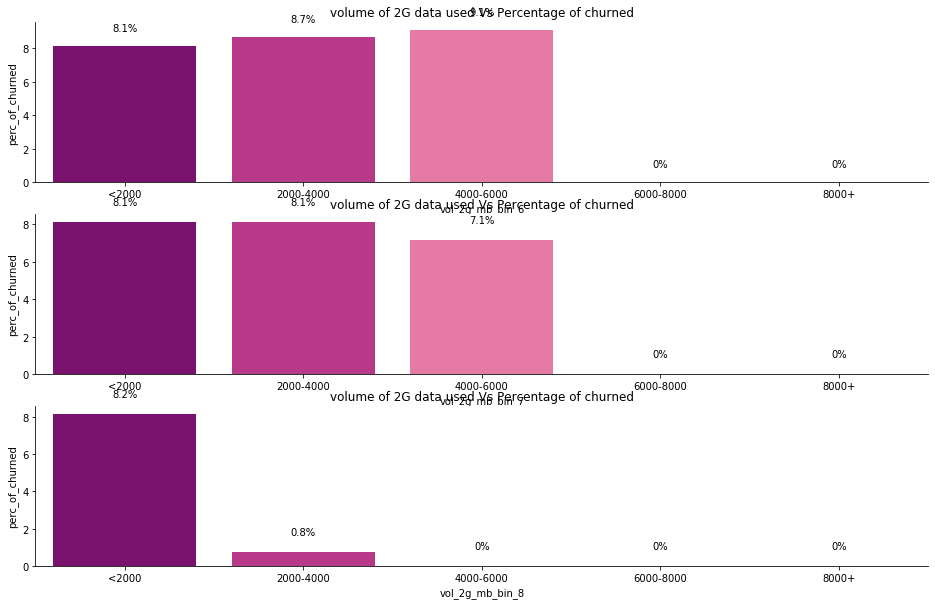

In [55]:
# Percentage of churn VS Total Outgoing minutes of usage
fi,fx=plt.subplots(3,1,figsize=(16,10))

perc_of_churned_graph('vol_2g_mb_bin_6',"volume of 2G data used Vs Percentage of churned", fx, 0)

perc_of_churned_graph('vol_2g_mb_bin_7',"volume of 2G data used Vs Percentage of churned", fx, 1)

perc_of_churned_graph('vol_2g_mb_bin_8',"volume of 2G data used Vs Percentage of churned", fx, 2)

plt.show()

In [56]:
churn_data.drop(["vol_2g_mb_bin_6","vol_2g_mb_bin_7","vol_2g_mb_bin_8"],axis=1,inplace=True)

#### Visualizing roaming related variables

<Figure size 1152x720 with 0 Axes>

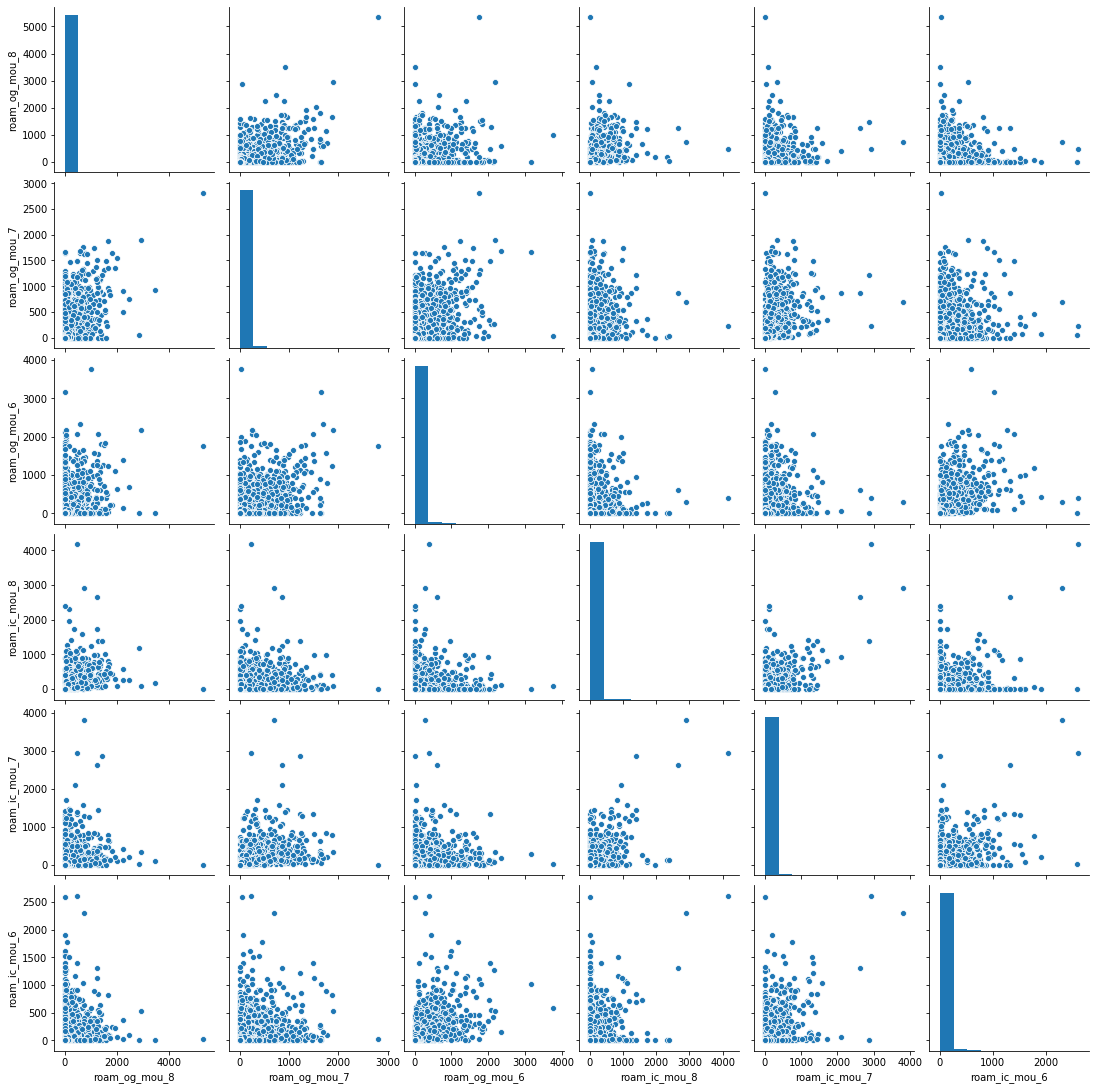

In [62]:
fig= plt.figure(figsize=(16,10))
roam_data= churn_data[["roam_og_mou_8","roam_og_mou_7","roam_og_mou_6","roam_ic_mou_8","roam_ic_mou_7","roam_ic_mou_6"]]
sns.pairplot(roam_data)
plt.show()

##### Heatmap to find relationship between numerical columns

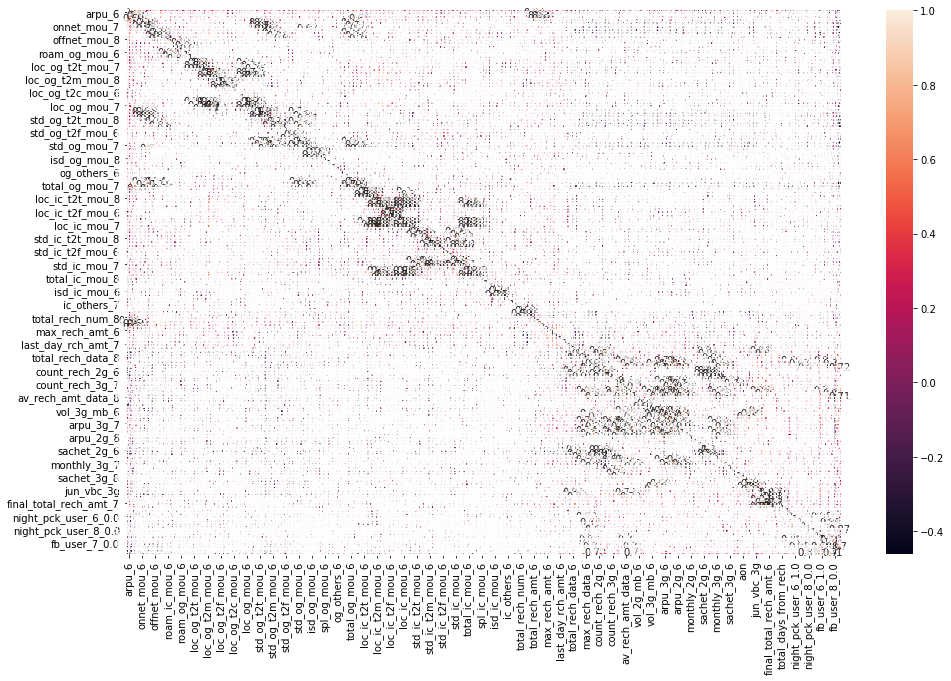

In [139]:
churn_data_corr= churn_data.corr()
f,ax= plt.subplots(figsize=(16,10))
sns.heatmap(churn_data_corr,annot=True)
plt.show()

- From graph we can see that data have highly multicollinear variables present
- We will use PCA to reduce dimentions

# Outlier Treatment 3 sigma deviation

capping ouliers from numerical columns

In [65]:
def cap_outliers(array):
    upper_limit = array.mean() + 3* array.std()
    lower_limit = array.mean() - 3* array.std()
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    return array

In [66]:
num_cols_in_df = list(churn_data.select_dtypes(include=[np.number]).columns.values) 
num_cols_in_df.remove("churn") 

#cap outliers in numeric columns
churn_data[num_cols_in_df] = churn_data[num_cols_in_df].apply(cap_outliers,axis=0)

## Dummy variables for categorical columns

In [67]:
num_cols_in_df= list(churn_data.select_dtypes(include=[np.number]).columns.values)
num_cols_in_df.remove("churn")

In [68]:
cat_cols=["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]

df = pd.get_dummies(churn_data[cat_cols],drop_first=True)

churn_data= pd.concat([churn_data,df],axis=1)

In [69]:
# dropping original categorical variables
churn_data.drop(cat_cols,inplace=True,axis=1)

# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
y = churn_data.pop("churn")
X = churn_data

In [72]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=40,train_size=0.7)

In [73]:
print("shape of X_train :", X_train.shape)
print("shape of X_test :", X_test.shape)

shape of X_train : (21000, 164)
shape of X_test : (9001, 164)


# feature scaling

Before doing PCA we will bring data in one normalized form

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
X_train[num_cols_in_df] = scaler.fit_transform(X_train[num_cols_in_df])

In [76]:
# Apply transform to test set.
X_test[num_cols_in_df] = scaler.transform(X_test[num_cols_in_df])

# Minority Oversampling to handle Class Imbalance
This section To Remove later

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

    - update the data to oversample the minority class to have 70 percent the number of examples of the majority class

In [78]:
over = SMOTE(sampling_strategy=0.7,random_state=2)
steps = [('o', over)] # oversampling
pipeline = Pipeline(steps=steps)
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)


print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 19281, 1: 1719})
Resampled dataset shape Counter({0: 19281, 1: 13496})


type(y_train)

# PCA
- We'll calculate the PCs using the train data, and apply them later on the test data

In [79]:
from sklearn.decomposition import PCA

In [80]:
# Make an instance of the Model
pca = PCA(random_state=42)

In [81]:
#fit PCA on training data only
pca.fit(X_train)

PCA(random_state=42)

#### Components and explained variance  from PCA

In [82]:
pca.components_

array([[-8.11024678e-02, -8.41737912e-02, -7.09743373e-02, ...,
         7.75135298e-02, -8.77032118e-03,  7.09665774e-02],
       [ 1.17680275e-01,  1.29681886e-01,  1.40769155e-01, ...,
         1.62795556e-02, -1.84407861e-03,  2.32582459e-02],
       [ 1.07859393e-01,  1.36721252e-01,  1.19139388e-01, ...,
        -9.68651293e-03,  2.04141755e-03, -3.04971944e-03],
       ...,
       [-1.66890963e-16,  3.89356256e-17, -2.81198558e-17, ...,
        -1.91540594e-01,  6.21701141e-02,  6.21701141e-02],
       [-0.00000000e+00, -1.54710119e-16,  2.64492397e-17, ...,
         2.72304832e-01,  4.15378445e-01,  4.15378445e-01],
       [ 0.00000000e+00, -1.01356768e-16,  9.97885104e-17, ...,
        -3.73044608e-01,  2.71285135e-01,  2.71285135e-01]])

In [83]:
# variance explained by each components
pca.explained_variance_ratio_

array([1.28813856e-01, 1.09793639e-01, 6.92422976e-02, 5.96103019e-02,
       4.02292225e-02, 2.91789638e-02, 2.70571763e-02, 2.55755692e-02,
       2.33357063e-02, 2.29144696e-02, 2.11311621e-02, 1.84283426e-02,
       1.77510209e-02, 1.66746345e-02, 1.58063740e-02, 1.53494255e-02,
       1.43414039e-02, 1.41387721e-02, 1.35172781e-02, 1.24794537e-02,
       1.14279184e-02, 9.70827700e-03, 9.34445848e-03, 9.07261291e-03,
       8.85228874e-03, 8.60814303e-03, 8.42236006e-03, 8.07456301e-03,
       7.51637275e-03, 7.43260582e-03, 6.83034576e-03, 6.59162297e-03,
       6.48081621e-03, 6.25323153e-03, 5.94678309e-03, 5.77581442e-03,
       5.69036449e-03, 5.66493288e-03, 5.24784264e-03, 5.14211036e-03,
       5.08228796e-03, 5.05211984e-03, 4.91507429e-03, 4.74333875e-03,
       4.67186527e-03, 4.48933028e-03, 4.17713893e-03, 4.14830027e-03,
       4.07174690e-03, 3.74428918e-03, 3.73037330e-03, 3.65450905e-03,
       3.55869926e-03, 3.45601867e-03, 3.42368383e-03, 3.38713705e-03,
      

#### Scree plot: for explained Variance and to find suitable no of components

In [84]:
# creating cumulative sum of variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [85]:
var_cumu

array([0.12881386, 0.23860749, 0.30784979, 0.36746009, 0.40768932,
       0.43686828, 0.46392546, 0.48950103, 0.51283673, 0.5357512 ,
       0.55688236, 0.57531071, 0.59306173, 0.60973636, 0.62554274,
       0.64089216, 0.65523356, 0.66937234, 0.68288962, 0.69536907,
       0.70679699, 0.71650526, 0.72584972, 0.73492234, 0.74377462,
       0.75238277, 0.76080513, 0.76887969, 0.77639606, 0.78382867,
       0.79065901, 0.79725064, 0.80373145, 0.80998469, 0.81593147,
       0.82170728, 0.82739765, 0.83306258, 0.83831042, 0.84345253,
       0.84853482, 0.85358694, 0.85850202, 0.86324535, 0.86791722,
       0.87240655, 0.87658369, 0.88073199, 0.88480374, 0.88854802,
       0.8922784 , 0.89593291, 0.89949161, 0.90294763, 0.90637131,
       0.90975845, 0.91293537, 0.91602291, 0.91899367, 0.92184685,
       0.9245605 , 0.92715345, 0.92964704, 0.93207104, 0.93442381,
       0.93673678, 0.93892207, 0.94102021, 0.94304107, 0.94502353,
       0.94697115, 0.9488822 , 0.95076749, 0.95264281, 0.95448

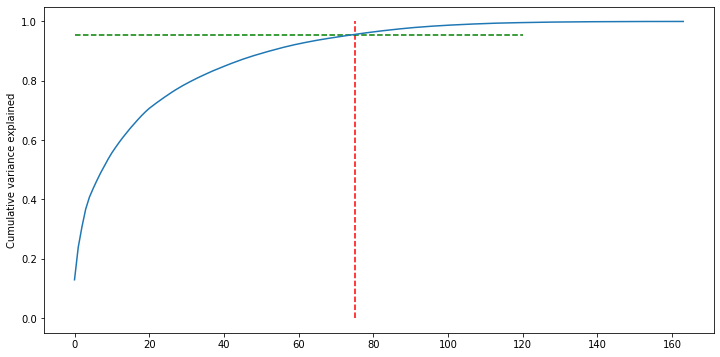

In [86]:
fig = plt.figure(figsize=[12,6])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.954, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

    - Using 68 components we can explain the 95% of variance.
    - So , We will run PCA with 68 components
    - alternatively we can use variace as 0.95 whicle creating PCA

In [87]:
from sklearn.decomposition import IncrementalPCA

In [88]:
component_no = 75
pca_final = IncrementalPCA(n_components=component_no)

In [89]:
X_train_pca = pca_final.fit(X_train_res)

In [90]:
#Apply the transform the training set first
X_train_pca = pca_final.transform(X_train_res)

In [91]:
X_train_pca.shape

(32777, 75)

#### Apply PCA on Test dataset

In [92]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 75)

#### Plotting the heatmap of the corr matrix

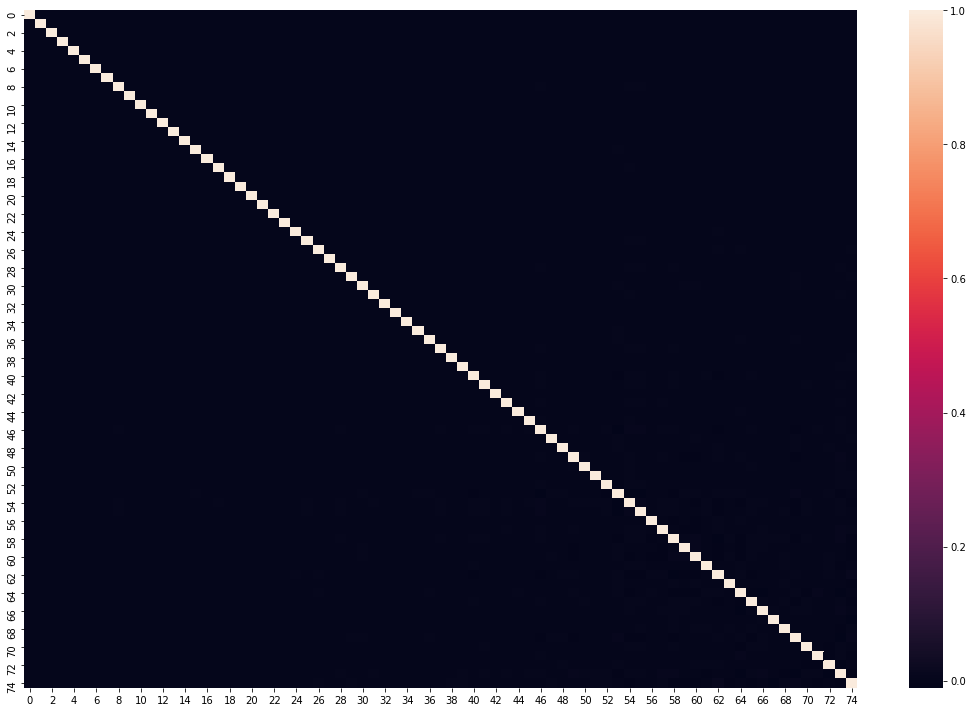

In [93]:
# correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())

#plot heatmap
plt.figure(figsize=[15,10])
sns.heatmap(corrmat)
plt.tight_layout()
plt.show()

    - We can see that there is no relation between newly created components
    - dark black color denotes 0 co-rrelation

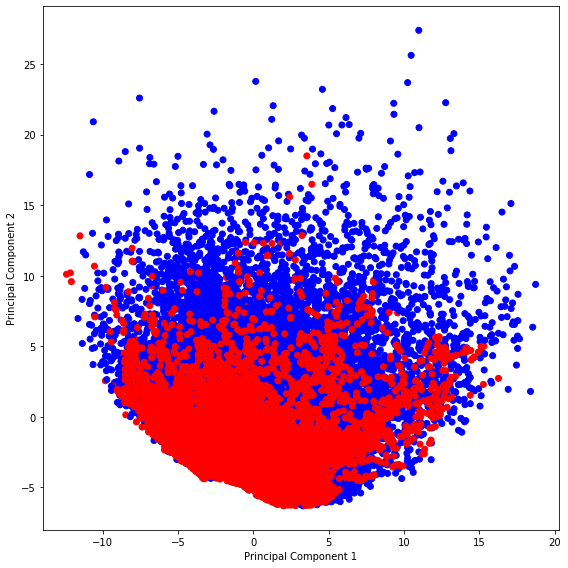

In [94]:
# Visualizing data using first two PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = pd.Series(y_train_res).map({0:'blue',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Model Building : for prediction

#### Parameter for evaluation:
    - We will use RECALL as our evaluation parameter.
    - As Recall is Out of actual churn How many Churn Model is able to predict correctly.
    - And we want model to be able to predict maximum Churns oot of real churn 
      so we will use Recall as our evaluation criteria.
    - Recall= (TP)/(TP+FN)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score ,confusion_matrix, classification_report
from imblearn.metrics import sensitivity_specificity_support
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [104]:
def model_eveluation(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_auc_score, prec_score, rec_score

### Random Forest Model with default parameters

- we will first build  model with default parameters

In [105]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=42)

# fit
rfc.fit(X_train_pca,y_train_res)

RandomForestClassifier(random_state=42)

In [106]:
# Making predictions the pca testing data
y_test_pred_pca = rfc.predict(X_test_pca)

# Model evaluation
accScore, rocaucScore, precScore, recScore = model_eveluation(y_test, y_test_pred_pca)

Accuracy Score :  92.17
ROC AUC score :  69.64
Precision score :  51.41
Recall score :  42.8


#### Tuning Hyperparameters for randomforest using above pca components

In [107]:
# Initialize the XGBoost
randomForest = RandomForestClassifier(random_state=42,n_jobs=-1)
# hyperparameter space
params = {'max_features': ['auto',30],
         'max_depth':[10,15],
         'min_samples_leaf':[30,50]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
gsm_model_rf = GridSearchCV(estimator=randomForest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit data 
gsm_model_rf.fit(X_train_res, y_train_res)

# fit the pca training data
gsm_model_rf.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.2min finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'max_features': ['auto', 30],
                         'min_samples_leaf': [30, 50]},
             scoring='roc_auc', verbose=1)

In [113]:
print("The best parameters: {0}".format(gsm_model_rf.best_params_))
print("The best score : {0}" .format(gsm_model_rf.best_score_))

The best parameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 30}
The best score : 0.9541262460440705


In [108]:
# predict the pca testing data
y_test_pred_pca = gsm_model_rf.predict(X_test_pca)

In [109]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = model_eveluation(y_test, y_test_pred_pca)

Accuracy Score :  90.52
ROC AUC score :  76.2
Precision score :  43.35
Recall score :  59.14


### Logistic Regression With PCA and GridsearchCV for tuning hyper parameters

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
# PCA
pca = PCA()

# logistic regression - We have already perform minority oversampling so we will not use class weight 
logistic = LogisticRegression()

# create pipeline for performing PCA and Logistic on X_train data
steps = [ 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [70, 80,90], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
gsm = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit data 
gsm.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [70, 80, 90]},
             scoring='roc_auc', verbose=1)

In [114]:
print("The best parameters: {0}".format(gsm.best_params_))
print("The best score : {0}" .format(gsm.best_score_))

The best parameters: {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 90}
The best score : 0.9252943522867424


In [115]:
resultdf= pd.DataFrame(gsm.cv_results_)
resultdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.619160,0.123909,0.000000,0.000000,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
1,4.468442,0.074605,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2,4.749671,0.212162,0.000000,0.000000,0.1,l1,90,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
3,4.605933,0.144012,0.128115,0.030295,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.919923,0.928075,0.923785,0.918039,0.920476,0.922060,0.003533,24
4,5.365254,0.188163,0.121866,0.033364,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.921560,0.929491,0.925591,0.919989,0.922846,0.923895,0.003347,14
5,5.883970,0.223067,0.146864,0.021193,0.1,l2,90,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.922969,0.930867,0.926673,0.921726,0.923839,0.925215,0.003261,5
6,4.127841,0.196737,0.000000,0.000000,0.5,l1,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,46
7,4.482811,0.057621,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
8,4.955094,0.179394,0.000000,0.000000,0.5,l1,90,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,4.595742,0.098286,0.153114,0.022963,0.5,l2,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.920184,0.928377,0.923526,0.918929,0.920659,0.922335,0.003375,20


In [116]:
# predict on test data
y_test_pred = gsm.predict(X_test)

# confusion matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
print(confusionMatrix)

# check area under curve
y_test_pred_prob = gsm.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),2))

#model evaluation
a,b,c,d = model_eveluation(y_test,y_test_pred)

[[7307  972]
 [ 156  566]]
AUC:    	 0.89
Accuracy Score :  87.47
ROC AUC score :  83.33
Precision score :  36.8
Recall score :  78.39


# Model For Finding impacting factors

##### Approach :
- First we will use random forest with raw variables To find out best 30 features.
- Then we will filter data using top 30 important features
- We will perform Logistic regression on those 30 features To find how much impact features have.
- We will add penalty to the model using hyperparameter tuning
- As logistic regression is more interpretable model
- Then based upon that we can suggest strategy to retain customers.

#### Building Random forest model without PCA using GridsearchCV

In [118]:
# random forest Classifier
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1,random_state=42)

# hyperparameter tuning
paramGrid = { "max_depth":[2,5,10],
             "min_samples_leaf":[30,35,40]}

# create 5 folds
folds = StratifiedKFold( shuffle = True, random_state = 42,n_splits = 5)

# create gridsearch object
Gsm_rf = GridSearchCV(estimator=forest, cv=folds, 
                     param_grid=paramGrid,
                     scoring='roc_auc', n_jobs=-1, verbose=1)

Gsm_rf.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [30, 35, 40]},
             scoring='roc_auc', verbose=1)

In [119]:
print("The best parameters: {0}".format(Gsm_rf.best_params_))
print("The best score : {0}" .format(Gsm_rf.best_score_))

The best parameters: {'max_depth': 10, 'min_samples_leaf': 30}
The best score : 0.9735147624060823


### Building model using above optimal values of hyperparameter

In [120]:
forest_final = RandomForestClassifier(n_estimators=200, n_jobs=-1,max_depth=10,min_samples_leaf=30,random_state=42)

#fit the model
forest_final.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=30, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [121]:
#Predictions on test data
y_test_pred_rf = forest_final.predict(X_test)

# create onfusion matrix
confusionMatrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print(confusionMatrix_rf)

[[7804  475]
 [ 219  503]]


In [122]:
#Model Evaluation
a,b,c,d = model_eveluation(y_test,y_test_pred_rf)

Accuracy Score :  92.29
ROC AUC score :  81.97
Precision score :  51.43
Recall score :  69.67


#### Important  Feature selection using Random Forest Model
  - Now we will choose the top 30 features from above model


In [123]:
# feature names
features = X_train.columns.tolist()

In [124]:
# feature_importance
importance = forest_final.feature_importances_

In [125]:
# create dataframe and sort it by highest percentage
featureImp_data = pd.DataFrame({'variables': features, 'Percentage': importance*100}).sort_values('Percentage', ascending=False).reset_index(drop=True)
featureImp_data.head(5)

,variables,Percentage
0,loc_ic_t2m_mou_8,7.115240
1,total_ic_mou_8,6.258507
2,loc_ic_mou_8,6.042762
3,roam_og_mou_8,5.999812
4,total_rech_amt_8,4.568280


In [126]:
##Extracting to 30 features
top_30_features = featureImp_data.variables[0:30]

In [127]:
#filtering training dataset to get 30 top features
X_train_impFeatures=X_train[top_30_features]
X_test_impFeatures = X_test[top_30_features]


In [128]:
importance.shape

(164,)

- We will plot heatmap for correlation to check multicollinearity


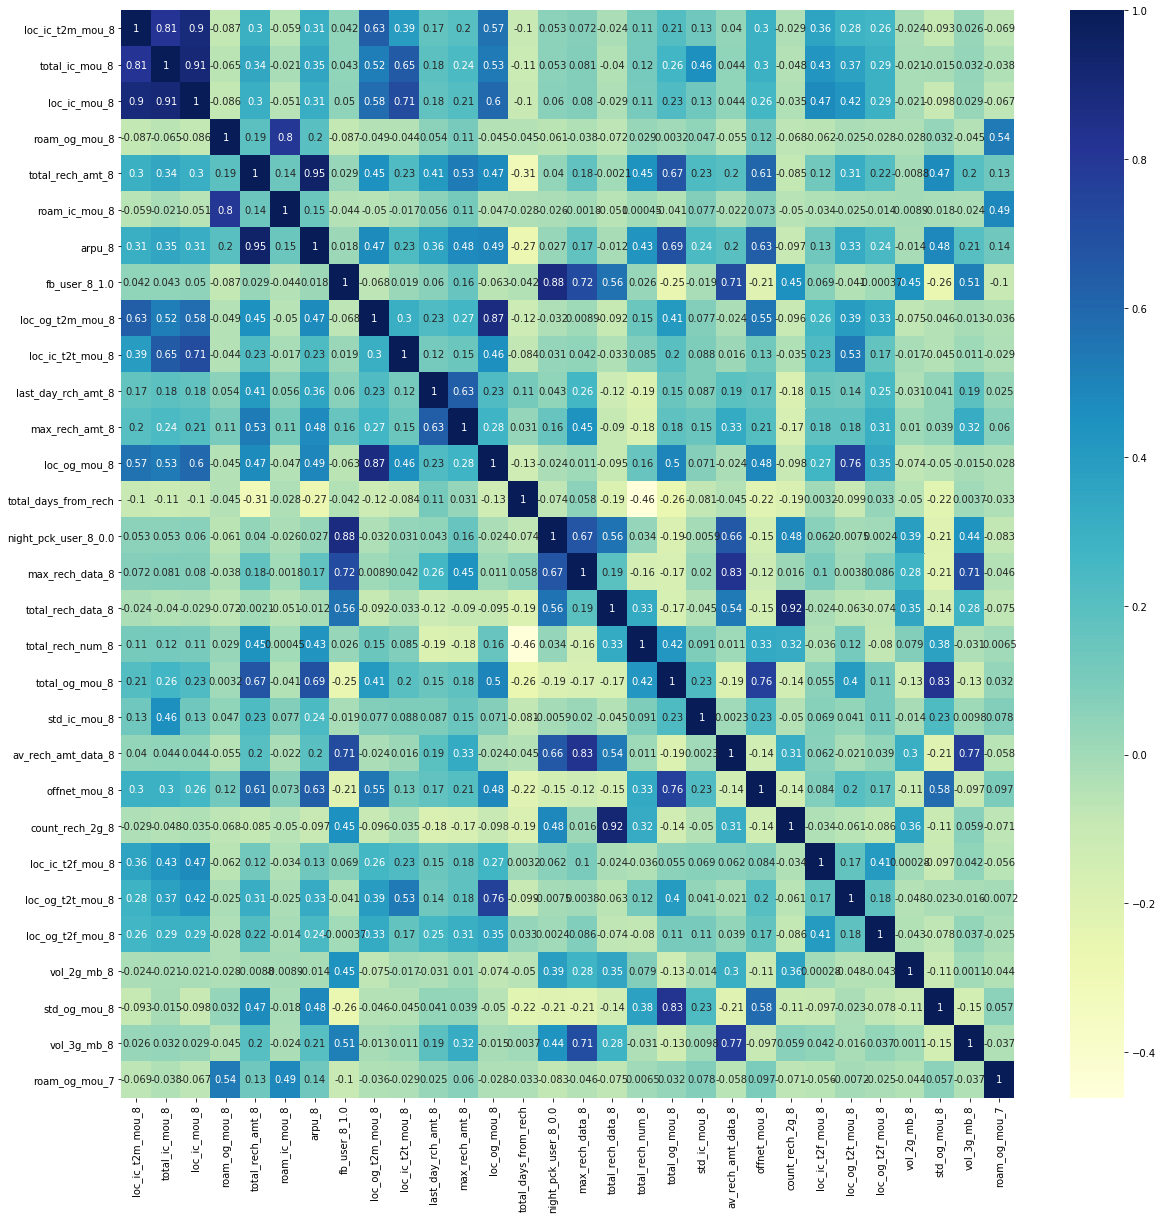

In [129]:
plt.figure(figsize=(20,20))
corre=X_train_impFeatures.corr()
ax=sns.heatmap(corre,annot=True,cmap="YlGnBu")
plt.show()

**Observations-**
- From above graph we can see that some columns have more than 80% of correlation.
- We will drop one column from two
- Below are columns having reation more than 80%<br>
local_ic_mou_8 =total_ic_mou_8=loc_ic_t2m_mou_8 <br>
total_rech_amt_8 =avg_arpu_8<br>
local_og_mou_8 =local_og_t2m_mou <br>
night_pack_user_8_0.0= fb_user_8_1.0 <br>
total_reach_data_8 =count_rech_2g_8 <br>
av_rech_amt_data_8 = max_rech_data_8 <br>

In [130]:
colsToDrop=["loc_ic_mou_8","loc_ic_t2m_mou_8","total_rech_amt_8","loc_og_mou_8","night_pck_user_8_0.0","count_rech_2g_8","max_rech_data_8"]
#dropping above columns from train as well as test dataset
X_train_impFeatures.drop(colsToDrop,axis=1,inplace=True)
X_test_impFeatures.drop(colsToDrop,axis=1,inplace=True)
X_train_impFeatures.shape

(21000, 23)

- we have already done standardization of the variables at the begining before PCA so we will not do it again
- we will use gridsearchcv to tune hyperparameters for finding best value
- Then we will check the VIF of all the variables present in our final model.

In [131]:
# Check the class weights
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918143
1    0.081857
Name: churn, dtype: float64

In [132]:
logistic_model = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# hyperparameters
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# no of folds
no_folds=3

# create gridsearch object
gsm_logistic_final = GridSearchCV(estimator=logistic_model, cv=no_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit model
gsm_logistic_final.fit(X_train_impFeatures,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.5s finished


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [133]:
print("The best parameters: {0}".format(gsm_logistic_final.best_params_))
print("The best score : {0}" .format(gsm_logistic_final.best_score_))

The best parameters: {'C': 0.1, 'penalty': 'l2'}
The best score : 0.8847127080679575


- We will build our final model based on best value of hyperparameters we got above
- We will be using Ridge Regression as penalty as it is returned as a best hyperparameter
- Ridge will try to make coefficients close to 0 but not 0
- Ridge will handle multicollinearity by adding a degree of bias to the regression estimates, 
  ridge regression reduces the standard errors.

In [134]:
logistic_final_model = LogisticRegression(class_weight={0:0.1, 1: 0.9},C=0.1,penalty="l2",random_state=42)

#fit model
logistic_final_model.fit(X_train_impFeatures,y_train)

LogisticRegression(C=0.1, class_weight={0: 0.1, 1: 0.9}, random_state=42)

In [135]:
# prediction on Train data
y_train_pred=logistic_final_model.predict(X_train_impFeatures)
a,b,c,d = model_eveluation(y_train,y_train_pred)

Accuracy Score :  83.99
ROC AUC score :  82.67
Precision score :  31.45
Recall score :  81.09


In [136]:
# prediction on Test data
y_test_pred=logistic_final_model.predict(X_test_impFeatures)
a,b,c,d = model_eveluation(y_test,y_test_pred)

Accuracy Score :  84.08
ROC AUC score :  81.99
Precision score :  30.88
Recall score :  79.5


   - We have got the good recall score using above model
   - Now we will see the features and their coefficient to decide variables that have most impact of churn

In [137]:
#  Extracting intercept from our final model
intercept_df = pd.DataFrame(logistic_final_model.intercept_.reshape((1,1)), columns = ['intercept'])
intercept_df.head()

,intercept
0,-1.231826


In [138]:
# Retriving  coefficients from our final model
coef=pd.DataFrame({"variables":list(X_train_impFeatures.columns),"coefficients":logistic_final_model.coef_[0]}).sort_values(by="coefficients",ascending=False).reset_index(drop=True)
coef

,variables,coefficients
0,total_days_from_rech,0.364926
1,arpu_8,0.216676
2,roam_og_mou_8,0.173696
3,roam_og_mou_7,0.088364
4,roam_ic_mou_8,0.030267
5,max_rech_amt_8,0.002858
6,offnet_mou_8,-0.032773
7,std_ic_mou_8,-0.043673
8,loc_og_t2f_mou_8,-0.059647
9,total_og_mou_8,-0.108285


# strategies to manage customer churn

- Below are some features which are highly realted to the churn
    - Total days from last recharge(total_days_from_rech)
    - arpu_8
    - roam_og_mou_8
    - roam_ic_mou_7
    - max_rech_amt_8
    - Total days from last data recharge(total_days_from_rech_data)
- Business should have focus on giving some schemes for roaming packages. As if incoming and outgoing roming minutes of usage is increased customer is most likely to churn
- If no of days passed from last recharge are increased ,user is likely to churn
- To retain those customers who have not recharged from long time ,Company should send them attractive offers and reminders so that customer will do the recharge by seeing offers .
-Company should pay attention to customers whose avg recharge amount is decresing in 8 month compare to other months because they are likely to churn.